<a href="https://colab.research.google.com/github/joyprakashk/clustering-customer-preference/blob/main/Clustering_Customer_Preferences.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing required py libraries

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
# setting seed for reproducibility

np.random.seed(123)
n_samples = 1000

In [3]:
# generate random preferences for each customer

male_filter_coffee = np.random.normal(0.61, 0.05, size = (n_samples // 2,))
male_cappuccino = np.random.normal(0.47, 0.05, size = (n_samples // 2,))

female_filter_coffee = np.random.normal(0.4, 0.05, size = (n_samples // 2,))
female_cappuccino = np.random.normal(0.65, 0.05, size = (n_samples // 2,))

In [4]:
# combine preferences of males & females

cappuccino_prefs = np.concatenate((male_cappuccino, female_cappuccino))
filter_coffee_prefs = np.concatenate((male_filter_coffee, female_filter_coffee))

In [5]:
# Combine preferences & gender labels

preferences = np.column_stack((cappuccino_prefs, filter_coffee_prefs))
gender_labels = np.array(['Male'] * (n_samples // 2) + ['Female'] * (n_samples // 2))

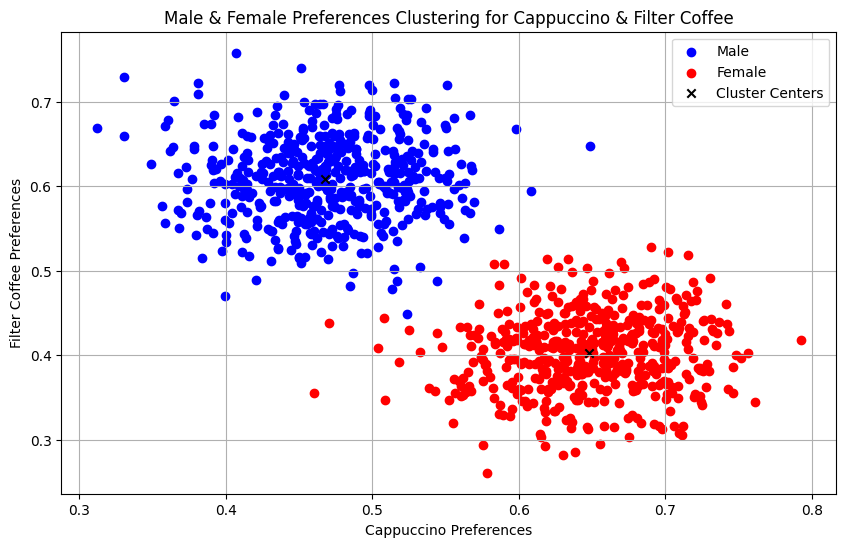

In [6]:
# perform K-means clustering

kmeans = KMeans(n_clusters = 2, random_state = 42)
kmeans.fit(preferences)
cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_


# Visualise the clusters

plt.figure(figsize = (10, 6))


# Plot male prefs

plt.scatter(preferences[gender_labels == 'Male',0], preferences[gender_labels == 'Male',1], color='blue', label = 'Male')

# Plot female prefs

plt.scatter(preferences[gender_labels == 'Female',0], preferences[gender_labels == 'Female',1], color='red', label = 'Female')

# plot cluster centers

plt.scatter(cluster_centers[:,0], cluster_centers[:,1], color='black', marker='x', label = 'Cluster Centers')


# Set labels & title

plt.xlabel('Cappuccino Preferences')
plt.ylabel('Filter Coffee Preferences')

plt.title('Male & Female Preferences Clustering for Cappuccino & Filter Coffee')

# Add legend

plt.legend()

# Show plot

plt.grid(True)
plt.show()